## Create a graph from shapefile

### Imports
Import the required libraries

In [1]:
import opentnsim

print("This notebook has been tested with OpenTNSim version {}".format(opentnsim.__version__))

This notebook has been tested with OpenTNSim version 1.1.2


In [2]:
# package(s) related to time, space and id
import datetime
import platform
import os

# you need these dependencies (you can get these from anaconda)
# package(s) related to the simulation
import simpy

# spatial libraries
import pyproj
import shapely.geometry
import momepy
import geopandas as gpd
from simplekml import Kml, Style

# package(s) for data handling
import numpy as np
import matplotlib.pyplot as plt

# OpenTNSIM
import opentnsim.core as core

# Used for mathematical functions
import math

# Used for making the graph to visualize our problem
import networkx as nx

# Graph location
location_graph = "Shape-Files/Rotterdam-Antwerpen-corridor"
name_graph = "edges_2.shp"

/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning:

The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.



### Create graph

**Important**: 

If you use windows and get the following error "ImportError: read_shp requires OGR: http://www.gdal.org/", you probably have [this issue](https://github.com/conda-forge/gdal-feedstock/issues/219). Solving it is possible by running the following commands in your terminal (as explained [here](https://gis.stackexchange.com/questions/294231/installing-gdal-with-anaconda):

```bash
#Create a new virtual environment
conda create -n testgdal -c conda-forge gdal vs2015_runtime=14

#Activate virtual environment
activate testgdal

#Open Jupyter notebook
jupyer notebook
```

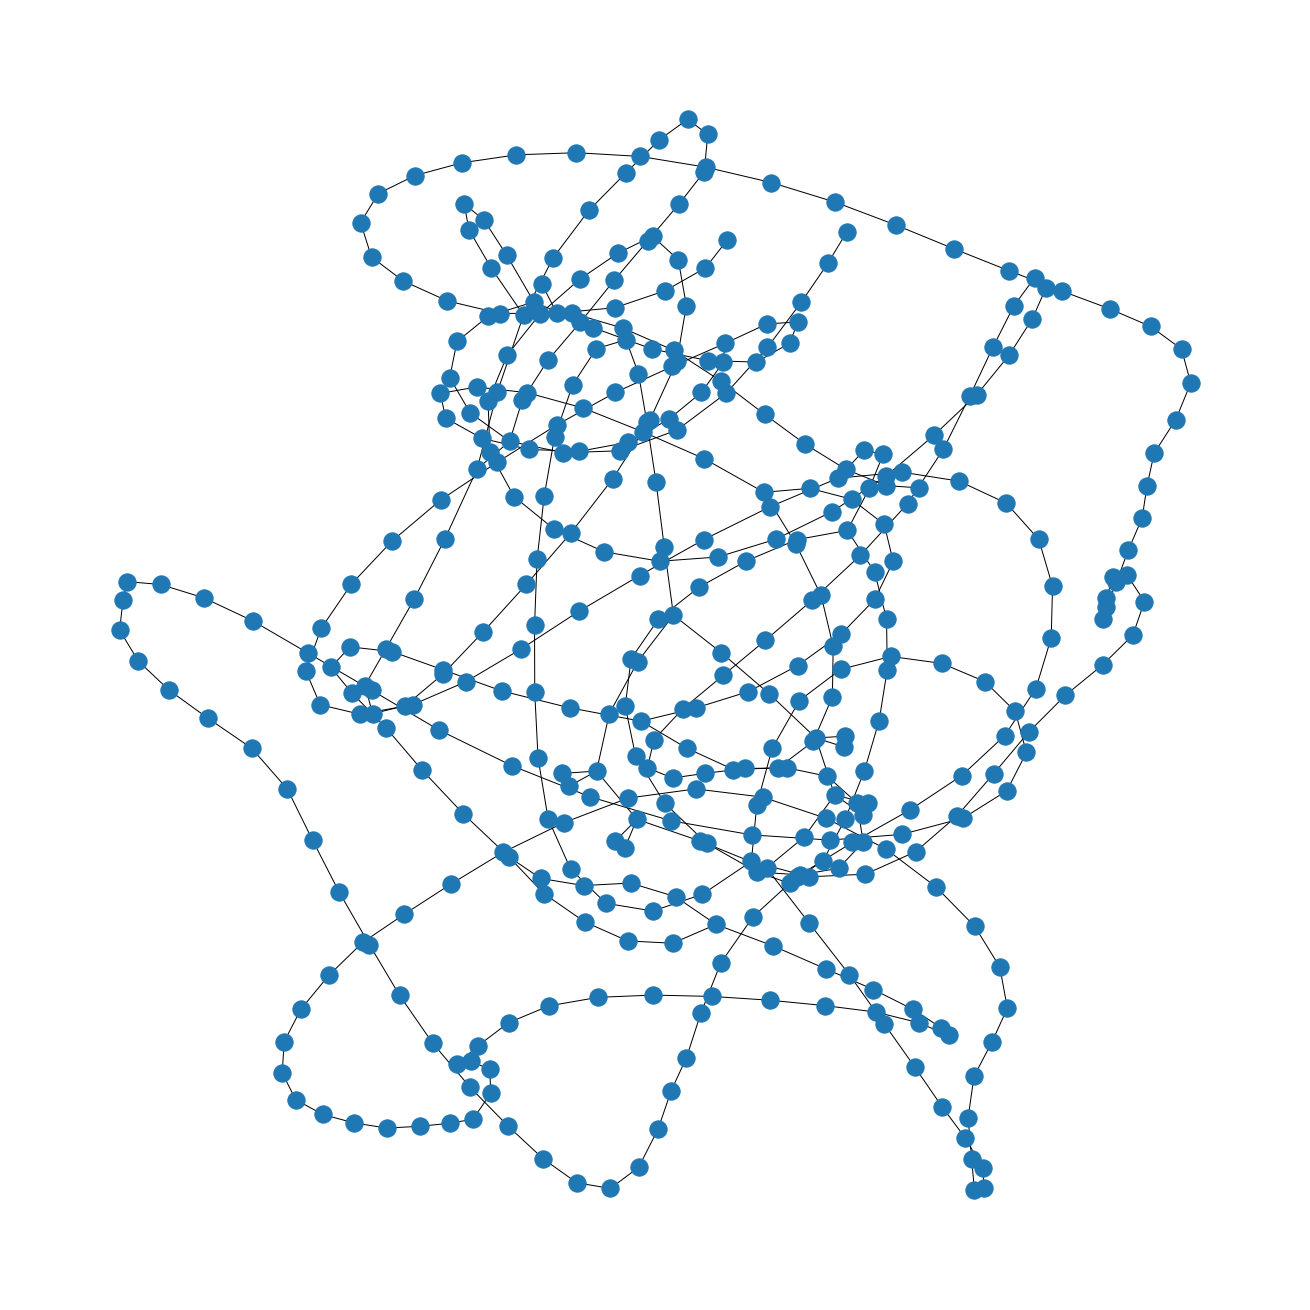

In [3]:
# Read the shape-file
gdf = gpd.read_file(os.path.join(location_graph, name_graph), crs="EPSG:4326").to_crs("EPSG:2882")
FG = momepy.gdf_to_nx(gdf, approach="primal", length="length_m")

# Draw the shape-file to get a first impression
plt.figure(figsize=(18, 18))
nx.draw(FG)

# Show the drawing
plt.show()